In [28]:
#from datetime import datetime
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from   pandas.plotting import register_matplotlib_converters
#from   pprint import pprint
from   sklearn.preprocessing import MinMaxScaler
from   tensorflow.keras import Sequential
#from   tensorflow.keras.backend import clear_session
from   tensorflow.keras.layers import Dense, Dropout, GRU, LSTM
#from   tensorflow.keras.losses import mean_squared_error as mse
#from   tensorflow.keras.optimizers import Adam
#from   tensorflow.keras.optimizers.schedules import ExponentialDecay
import yfinance as yf

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint

In [2]:
STOCKS = [
    '^GSPC', 'AAXN', 'ABMD', 'ANET', 'AYX', 'BIDU', 'DDOG', 'DOCU', 
    'EDIT', 'ETSY', 'FSLY', 'GH', 'ISRG', 'LYV', 'MDB', 'MELI', 'MTCH', 
    'NVCR', 'OKTA', 'PANW', 'PINS', 'PTON', 'ROKU', 'SHOP', 'TDOC', 
    'TEAM', 'TREX', 'TTD', 'TTWO', 'VEEV', 'ZEN', 'ZG']
tickers = ' '.join(STOCKS)

In [3]:
data = yf.download(tickers, start='2010-01-01')
data.head()

[*********************100%***********************]  32 of 32 completed


Adj Close                                                     ...  \
                AAXN  ABMD ANET AYX       BIDU DDOG DOCU EDIT ETSY FSLY  ...   
Date                                                                     ...   
2010-01-04      4.65  8.74  NaN NaN  41.002998  NaN  NaN  NaN  NaN  NaN  ...   
2010-01-05      4.70  8.53  NaN NaN  40.590000  NaN  NaN  NaN  NaN  NaN  ...   
2010-01-06      5.84  8.40  NaN NaN  41.250000  NaN  NaN  NaN  NaN  NaN  ...   
2010-01-07      5.66  8.40  NaN NaN  40.463001  NaN  NaN  NaN  NaN  NaN  ...   
2010-01-08      5.56  8.23  NaN NaN  40.426998  NaN  NaN  NaN  NaN  NaN  ...   

           Volume                                                          
             SHOP TDOC TEAM    TREX TTD     TTWO VEEV ZEN  ZG       ^GSPC  
Date                                                                       
2010-01-04    NaN  NaN  NaN  427200 NaN  3666400  NaN NaN NaN  3991400000  
2010-01-05    NaN  NaN  NaN  618800 NaN  4442300  NaN NaN NaN  2491020000  
2010-01-06    NaN  NaN  NaN  343600 NaN  2829400  NaN NaN NaN  4972660000  
2010-01-07    NaN  NaN  NaN  147200 NaN  2655500  NaN NaN NaN  5270680000  
2010-01-08    NaN  NaN  NaN  193200 NaN  2143400  NaN NaN NaN  4389590000  

[5 rows x 192 columns]

In [4]:
def rename(names):
    return f'{names[1]}_{names[0].replace(" ", "_")}'

In [5]:
data.columns = [rename(x) for x in data.columns]
data.head()

,AAXN_Adj_Close,ABMD_Adj_Close,ANET_Adj_Close,AYX_Adj_Close,BIDU_Adj_Close,DDOG_Adj_Close,DOCU_Adj_Close,EDIT_Adj_Close,ETSY_Adj_Close,FSLY_Adj_Close,...,SHOP_Volume,TDOC_Volume,TEAM_Volume,TREX_Volume,TTD_Volume,TTWO_Volume,VEEV_Volume,ZEN_Volume,ZG_Volume,^GSPC_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,4.65,8.74,NaN,NaN,41.002998,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,427200,NaN,3666400,NaN,NaN,NaN,3991400000
2010-01-05,4.70,8.53,NaN,NaN,40.590000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,618800,NaN,4442300,NaN,NaN,NaN,2491020000
2010-01-06,5.84,8.40,NaN,NaN,41.250000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,343600,NaN,2829400,NaN,NaN,NaN,4972660000
2010-01-07,5.66,8.40,NaN,NaN,40.463001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,147200,NaN,2655500,NaN,NaN,NaN,5270680000
2010-01-08,5.56,8.23,NaN,NaN,40.426998,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,193200,NaN,2143400,NaN,NaN,NaN,4389590000


In [6]:
keep = [x for x in list(data) if 'Adj' in x] 
data = data[keep]
data.rename(columns={x: x.replace('_Adj_Close', '') for x in list(data)},
            inplace=True)
data.fillna(method='bfill', inplace=True)
data.head()

,AAXN,ABMD,ANET,AYX,BIDU,DDOG,DOCU,EDIT,ETSY,FSLY,...,SHOP,TDOC,TEAM,TREX,TTD,TTWO,VEEV,ZEN,ZG,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,4.65,8.74,55.0,15.5,41.002998,37.549999,39.73,18.200001,30.0,24.25,...,17.0,19.0,21.0,5.0600,30.1,10.40,37.16,13.43,11.153727,1132.989990
2010-01-05,4.70,8.53,55.0,15.5,40.590000,37.549999,39.73,18.200001,30.0,24.25,...,17.0,19.0,21.0,5.0275,30.1,10.47,37.16,13.43,11.153727,1136.520020
2010-01-06,5.84,8.40,55.0,15.5,41.250000,37.549999,39.73,18.200001,30.0,24.25,...,17.0,19.0,21.0,4.9050,30.1,10.44,37.16,13.43,11.153727,1137.140015
2010-01-07,5.66,8.40,55.0,15.5,40.463001,37.549999,39.73,18.200001,30.0,24.25,...,17.0,19.0,21.0,4.8875,30.1,10.39,37.16,13.43,11.153727,1141.689941
2010-01-08,5.56,8.23,55.0,15.5,40.426998,37.549999,39.73,18.200001,30.0,24.25,...,17.0,19.0,21.0,4.9175,30.1,10.42,37.16,13.43,11.153727,1144.979980


In [7]:
data = data / data.iloc[0, :]
data = np.log(data)
original_dates = data.index
data.index = range(data.shape[0])
data.head()

,AAXN,ABMD,ANET,AYX,BIDU,DDOG,DOCU,EDIT,ETSY,FSLY,...,SHOP,TDOC,TEAM,TREX,TTD,TTWO,VEEV,ZEN,ZG,^GSPC
0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.010695,-0.024321,0.0,0.0,-0.010123,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.006444,0.0,0.006708,0.0,0.0,0.0,0.003111
2,0.227864,-0.039679,0.0,0.0,0.006006,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.031111,0.0,0.003839,0.0,0.0,0.0,0.003656
3,0.196557,-0.039679,0.0,0.0,-0.013257,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.034686,0.0,-0.000962,0.0,0.0,0.0,0.007649
4,0.178731,-0.060124,0.0,0.0,-0.014147,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.028566,0.0,0.001921,0.0,0.0,0.0,0.010527


In [8]:
data.tail()

,AAXN,ABMD,ANET,AYX,BIDU,DDOG,DOCU,EDIT,ETSY,FSLY,...,SHOP,TDOC,TEAM,TREX,TTD,TTWO,VEEV,ZEN,ZG,^GSPC
2634,2.990341,3.372019,1.371965,2.374996,1.099189,0.863075,1.443642,0.600827,1.166271,1.105735,...,3.974512,2.378278,2.173452,3.193984,2.593915,2.607947,1.860896,1.844572,1.691035,1.012287
2635,3.022678,3.363818,1.366184,2.356034,1.101219,0.870686,1.434689,0.634889,1.216099,1.141000,...,3.981703,2.344232,2.161296,3.200929,2.611705,2.623623,1.861649,1.847276,1.727704,1.016585
2636,3.000345,3.319622,1.336197,2.323589,1.085199,0.857329,1.417211,0.523818,1.185503,1.143237,...,3.965843,2.338815,2.130610,3.188294,2.577823,2.598908,1.841412,1.806297,1.666103,0.990390
2637,3.026960,3.319994,1.349159,2.360550,1.104457,0.869682,1.444236,0.545705,1.216692,1.214270,...,3.987152,2.362342,2.150432,3.190411,2.610924,2.602690,1.852067,1.842333,1.663388,1.001289
2638,3.028106,3.309682,1.342770,2.349346,1.088735,0.811078,1.497315,0.463112,1.229056,1.271843,...,3.980231,2.319597,2.154030,3.223214,2.604362,2.608230,1.844055,1.861728,1.603347,0.976764


In [10]:
for c in list(data):
    n_missing = (1 * pd.isnull(data[c])).sum()
    if n_missing:
        print(f'{c}: {n_missing}')

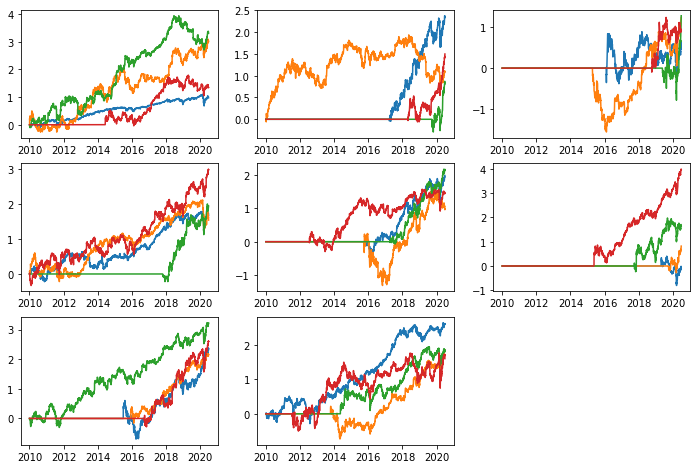

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(331)
plt.plot(original_dates, data[STOCKS[:4]])

plt.subplot(332)
plt.plot(original_dates, data[STOCKS[4:8]]);

plt.subplot(333)
plt.plot(original_dates, data[STOCKS[8:12]]);

plt.subplot(334)
plt.plot(original_dates, data[STOCKS[12:16]]);

plt.subplot(335)
plt.plot(original_dates, data[STOCKS[16:20]])

plt.subplot(336)
plt.plot(original_dates, data[STOCKS[20:24]]);

plt.subplot(337)
plt.plot(original_dates, data[STOCKS[24:28]]);

plt.subplot(338)
plt.plot(original_dates, data[STOCKS[28:]]);

In [18]:
data = data.sort_index(ascending=False)
data.head()

,AAXN,ABMD,ANET,AYX,BIDU,DDOG,DOCU,EDIT,ETSY,FSLY,...,SHOP,TDOC,TEAM,TREX,TTD,TTWO,VEEV,ZEN,ZG,^GSPC
2638,3.028106,3.309682,1.342770,2.349346,1.088735,0.811078,1.497315,0.463112,1.229056,1.271843,...,3.980231,2.319597,2.154030,3.223214,2.604362,2.608230,1.844055,1.861728,1.603347,0.976764
2637,3.026960,3.319994,1.349159,2.360550,1.104457,0.869682,1.444236,0.545705,1.216692,1.214270,...,3.987152,2.362342,2.150432,3.190411,2.610924,2.602690,1.852067,1.842333,1.663388,1.001289
2636,3.000345,3.319622,1.336197,2.323589,1.085199,0.857329,1.417211,0.523818,1.185503,1.143237,...,3.965843,2.338815,2.130610,3.188294,2.577823,2.598908,1.841412,1.806297,1.666103,0.990390
2635,3.022678,3.363818,1.366184,2.356034,1.101219,0.870686,1.434689,0.634889,1.216099,1.141000,...,3.981703,2.344232,2.161296,3.200929,2.611705,2.623623,1.861649,1.847276,1.727704,1.016585
2634,2.990341,3.372019,1.371965,2.374996,1.099189,0.863075,1.443642,0.600827,1.166271,1.105735,...,3.974512,2.378278,2.173452,3.193984,2.593915,2.607947,1.860896,1.844572,1.691035,1.012287


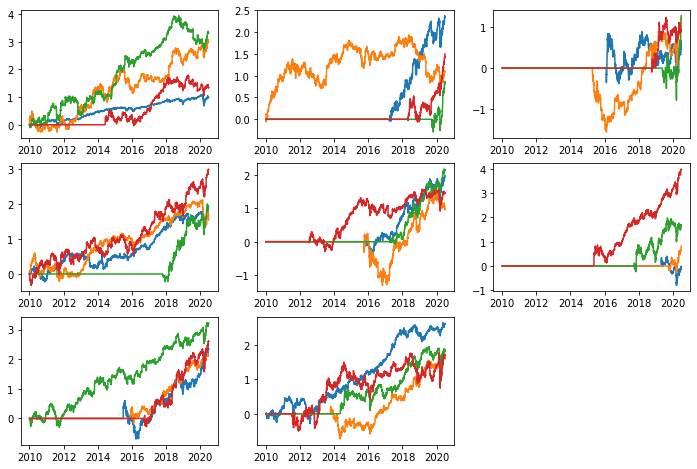

In [19]:
rev_dates = original_dates[::-1]
plt.figure(figsize=(12, 8))
plt.subplot(331)
plt.plot(rev_dates, data[STOCKS[:4]])

plt.subplot(332)
plt.plot(rev_dates, data[STOCKS[4:8]]);

plt.subplot(333)
plt.plot(rev_dates, data[STOCKS[8:12]]);

plt.subplot(334)
plt.plot(rev_dates, data[STOCKS[12:16]]);

plt.subplot(335)
plt.plot(rev_dates, data[STOCKS[16:20]])

plt.subplot(336)
plt.plot(rev_dates, data[STOCKS[20:24]]);

plt.subplot(337)
plt.plot(rev_dates, data[STOCKS[24:28]]);

plt.subplot(338)
plt.plot(rev_dates, data[STOCKS[28:]]);

In [20]:
input_feature = data.values
input_data = input_feature.copy()

In [22]:
scaler = MinMaxScaler((0, 1))
input_data = scaler.fit_transform(input_feature)

In [23]:
LOOKBACK = 20
TEST_FRAC = 0.3
test_size = int(TEST_FRAC * len(data))
test_size

791

In [25]:
X, y = [], []
for i in range(len(data) - LOOKBACK - 1):
    t = []
    for j in range(LOOKBACK):
        t.append(input_data[[(i + j)], :])
    X.append(t)
    y.append(input_data[i + LOOKBACK, 1])

In [26]:
X, y = np.array(X), np.array(y)
X_test = X[:test_size + LOOKBACK]

In [27]:
X = X.reshape(X.shape[0], LOOKBACK, -1)
X_test = X_test.reshape(X_test.shape[0], LOOKBACK, -1)
print(X.shape, X_test.shape)
print(y.shape)

(2618, 20, 32) (811, 20, 32)
(2618,)


In [46]:
X.shape

(2618, 20, 32)

In [34]:
rnn_cell = GRU
RNN_UNITS = 30
EPOCHS = 10
BATCH = 32

In [35]:
model = Sequential()
model.add(
    rnn_cell(units=RNN_UNITS, 
             return_sequences= True, 
             input_shape=(X.shape[1], X.shape[2])))
model.add(rnn_cell(units=RNN_UNITS, return_sequences=True))
model.add(rnn_cell(units=RNN_UNITS))
model.add(Dense(units=1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 20, 30)            5760      
_________________________________________________________________
gru_4 (GRU)                  (None, 20, 30)            5580      
_________________________________________________________________
gru_5 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 16,951
Trainable params: 16,951
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [38]:
history = model.fit(X, y, epochs=EPOCHS, batch_size=BATCH)

Train on 2618 samples
Epoch 1/10
2618/2618 [==============================] - 3s 1ms/sample - loss: 2.9549e-04
Epoch 2/10
2618/2618 [==============================] - 3s 1ms/sample - loss: 1.9713e-04
Epoch 3/10
2618/2618 [==============================] - 3s 1ms/sample - loss: 1.9485e-04
Epoch 4/10
2618/2618 [==============================] - 3s 1ms/sample - loss: 1.8289e-04
Epoch 5/10
2618/2618 [==============================] - 3s 1ms/sample - loss: 2.5303e-04
Epoch 6/10
2618/2618 [==============================] - 3s 1ms/sample - loss: 2.0417e-04
Epoch 7/10
2618/2618 [==============================] - 3s 1ms/sample - loss: 1.7128e-04
Epoch 8/10
2618/2618 [==============================] - 3s 1ms/sample - loss: 2.0008e-04
Epoch 9/10
2618/2618 [==============================] - 3s 1ms/sample - loss: 1.7066e-04
Epoch 10/10
2618/2618 [==============================] - 3s 1ms/sample - loss: 1.5094e-04


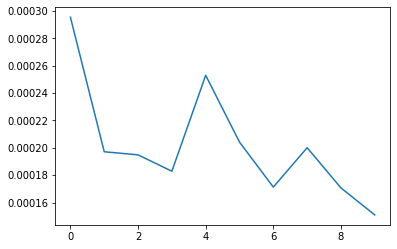

In [42]:
plt.plot(history.history['loss']);

In [43]:
preds = model.predict(X_test)

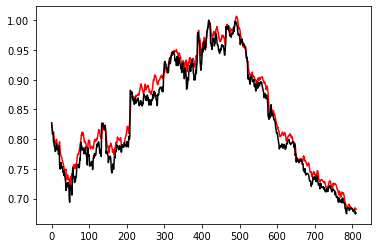

In [45]:
plt.plot(preds, 'r-')
plt.plot(input_data[LOOKBACK:test_size + (2*LOOKBACK), 1], 'k-');